# Improving animal diet

The new Datalab venture, RecomMole, is developing cutting edge algorithms to recommend domestic mole owners the taste of worms that would make their pets happy. 

During the evaluation phase, one of 4 different types of worms is chosen to feed the mole. With a certain (unknown to you) probability, the worms are eaten by the mole. This probability depends only on the worm type.

**Your task**: develop an algorithm that will identify, as soon as possible, the tastier worm.

1. You can rephrase this problem as a multi-armed Bernoulli bandit (how?). Implement a class that simulates a draw of a Bernoulli arm (passing as parameter `p`, and with a `step` method that gives you the reward.

2. Let's implement your agent. In the example included, I have implemented an $\epsilon$-greedy agent, but you can try something else (for instance, softmax selection).

3. Once you have an agent and a Bernoulli arm, simulate an episode with four arms (= four instances of your Bernoulli arm class) with values of p = [0.1,0.2,0.9,0.5]. You can see some diagnostic charts below (to help you understand the effect of the hyperparameters, (i.e. $\epsilon$ or $\tau$).

4. Now run your tests! Take 1000 draws from a uniform distribution and choose some value of $\epsilon$. This will be the value that will be used in production (so choose it well, otherwise you are responsible of unhappy moles).

5. (BONUS): Let's incorporate some prior knowledge on the distribution. You can do that using a beta distribution:

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

rv = beta(a=2,b=5)

x = np.linspace(0,1,100)



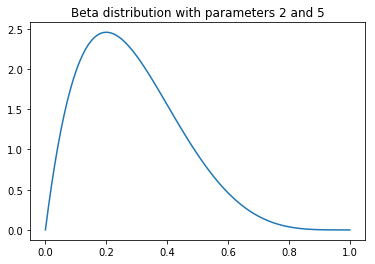

In [2]:
plt.plot(x,rv.pdf(x))
plt.title("Beta distribution with parameters 2 and 5")
plt.show()

Change the shape parameters that would make sense to the problem (hint: how picky do you think moles are?) Will this new prior affect the selection of the hyperparameters? If so, how? Could you use a better algorithm?

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Cheat/don't cheat."></form>''')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
class BernoulliArm:
    ''' Assume that the '''
    def __init__(self, p):
        self.p = p
    def step(self):
        if np.random.rand()> self.p:
            return 0
        else:
            return 1
        

In [6]:
class EpsilonGreedyAgent:
    ''' Epsilon-greedy agent with fixed epsilon'''
    def __init__(self, epsilon, n_actions):
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.Q = np.zeros(n_actions)
        self.N = np.zeros(n_actions)
        
    def update(self, action, reward):
        self.N[action] += 1
        N = self.N[action]
        self.Q[action] += (reward-self.Q[action])/N
    
    def choose(self):
        self.epsilon = 0.99*self.epsilon
        if np.random.rand()>self.epsilon:
            action = np.argmax(self.Q)
        else:
            action = np.random.choice(range(self.n_actions))
        return action    

In [16]:
def evaluate_agent(agent, arms, n_episodes):
    n_actions = len(arms)
    stats = {
            'rewards':[], 
            'actions':[],
            'epsilons':[]
            }

    for _ in range(n_episodes):

        # Agent chooses action
        action = agent.choose()

        # Step of the environment: the reward is given
        reward = arms[action].step()

        # The agent updates her information
        agent.update(action, reward)

        # Add some statistics 
        stats['rewards'].append(reward)
        stats['actions'].append(action)
        stats['epsilons'].append(agent.epsilon)
        
        # Add jitter to the plot to make it nicer
        noisy_actions = stats['actions'] + 0.1*np.random.randn(len(stats['actions']))
    
    # Action timeline: to see when the best action is found
    timestep = list(range(1,n_episodes+1))
    
    print("Optimal action: ", np.argmax([arm.p for arm in arms]))
    
    plt.scatter(timestep, noisy_actions, c=stats['rewards'])
    plt.title("Detecting the time when the optimal action is found")
    plt.xlabel("Timestep")
    plt.ylabel("Arm")
    plt.show()
    
    # Epsilon per timestep
    plt.plot(timestep, stats['epsilons'])
    plt.title("Epsilon per timestep")
    plt.xlabel("Timestep")
    plt.ylabel("Epsilon")
    plt.show()
    
    # Distribution of actions played
    plt.hist(stats['actions'])
    plt.title("Distribution of actions played")
    plt.xlabel("Action")
    plt.ylabel("Frequency")
    plt.show()
    
    # Reward per timestep
    plt.plot(timestep, np.cumsum(stats["rewards"])/timestep)
    plt.xlabel("Timestep")
    plt.ylabel("Cumulative average reward")
    plt.show()

In [17]:
arms = [BernoulliArm(p) for p in [0.1,0.2,0.9,0.5]]

Optimal action:  2


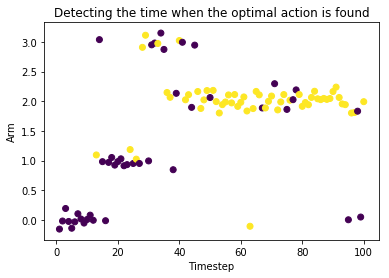

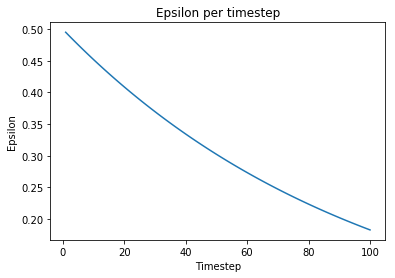

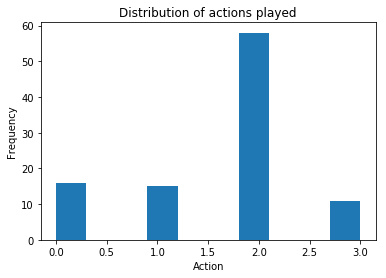

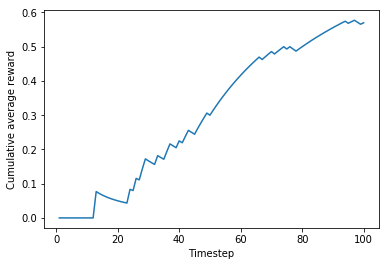

In [18]:
evaluate_agent(EpsilonGreedyAgent(0.5,4), arms, 100)